<a href="https://www.kaggle.com/code/amarmoibrahim964/titanic?scriptVersionId=135184397" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![/kaggle/input/titanic23/titanic-img.jpg](https://msmt.org/wp-content/uploads/2022/08/Titanic_webslide-scaled-1.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import our Data

data= pd.read_csv('/kaggle/input/titanic/train.csv', sep =',',encoding ='utf-8')


In [3]:
#check the frist 5 rows

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check the last 5 rows

data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Number of Rows And Number of Columns

print("Number of columns :",data.shape[0])
print("Number of Rows :",data.shape[1])


Number of columns : 891
Number of Rows : 12


In [6]:
#Get Information About Our Dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Get Overall Statistics About The Dataframe**

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Check Missing Values In The Dataset
data.isnull()
per_missing=data.isnull().sum()*100/len(data)

per_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

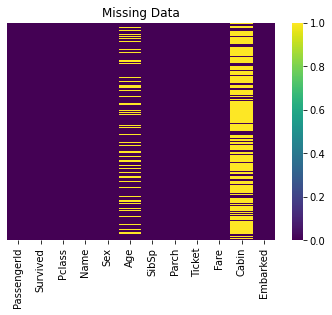

In [9]:
# to be more clear we use heatmap

sns.heatmap(data.isnull(),cmap='viridis',cbar=True,yticklabels=False)
plt.title("Missing Data")
plt.show()



**Handle Missing Values**

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#We can see 78.2 % of Cabin Column is missing so it is unusaless so we can drop it .

data.drop('Cabin',axis=1,inplace=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
#We can see also 20.57 % of Age Column is missing and Age is very imoprtant for as so we can replace missing Age data with the mean of Age

data['Age'].fillna(data['Age'].mean(),inplace=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [13]:
# we need to  prepare our data to nomerical then we can use it in machine learning.

data['Sex'].unique()


array(['male', 'female'], dtype=object)

In [14]:

# Sex convert to Numric 0 or 1

x=data['Sex'].map({'male':1,'female':0})
data.insert(5,'Gender_new',x)






In [15]:
data


,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C


In [16]:
#Handling with Embarked columns 


data['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
#Add New_Embarked Columns 

def Embarked(Embarked):
    if Embarked =="Q":
        return "Queenstown"
    elif Embarked =="S":
        return "Southampton"
    else:
        return "Cherbourg"

data['New_Embarked']=data['Embarked'].apply(Embarked)


data

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C,Cherbourg


In [18]:
#Check if we have Duplicatein our data

dup=data.duplicated().any()
print("Any duplicate Value?",dup)


Any duplicate Value? False


In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'New_Embarked'],
      dtype='object')

In [20]:
#we need the numrical data to used in Machine learning 

df_Titanic=data[['Survived', 'Pclass', 'Name', 'Gender_new', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']]
df_Titanic

,Survived,Pclass,Name,Gender_new,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,C


In [21]:
# Still we need Convert  Embarked as Dummies
df_Titanic =pd.get_dummies(df_Titanic,columns=['Embarked'])

df_Titanic

,Survived,Pclass,Name,Gender_new,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,0,0,1
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,1,0,0


# **Then we will clean data **

In [22]:

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,S,Southampton


In [23]:
#Convert Survived  to Catigory Survived or Died

def Result(Result):
    if Result== 0:
        return "Died"
    else:
        return "Survived"

data['PassengerCase']=data['Survived'].apply(Result)

data

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Embarked,PassengerCase
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S,Southampton,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C,Cherbourg,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Southampton,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S,Southampton,Survived
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S,Southampton,Died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S,Southampton,Died
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S,Southampton,Survived
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S,Southampton,Died
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C,Cherbourg,Survived


In [24]:
#Convert  Aslo Pclass  to Catigory Third , Second or First Class

def classes(clas):
    if clas== 1:
        return "First Class"
    elif clas== 2:
        return "Second Class"
    
    else:
        return "Third Class"

data['New_Pclass']=data['Pclass'].apply(classes)

data


,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Embarked,PassengerCase,New_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S,Southampton,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C,Cherbourg,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Southampton,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S,Southampton,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S,Southampton,Died,Third Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S,Southampton,Died,Second Class
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S,Southampton,Survived,First Class
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S,Southampton,Died,Third Class
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C,Cherbourg,Survived,First Class


In [25]:
#Convert  Aslo Age  to Catigory Third , Second or First Class

def age_cat(age):
    if age >= 80.0:
        return "Elderly"
    elif age>= 66.0:
        return "Middle-Aged"
    elif age>= 26.0:
        return "Youth"
    elif age>= 18.0:
        return "Adolescence"
    elif age>=11.0:
        return "underage"
    else:
        return "Kides"

data['Age_Cat']=data['Age'].apply(age_cat)

data


,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Embarked,PassengerCase,New_Pclass,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S,Southampton,Died,Third Class,Adolescence
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C,Cherbourg,Survived,First Class,Youth
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Southampton,Survived,Third Class,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S,Southampton,Survived,First Class,Youth
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S,Southampton,Died,Third Class,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S,Southampton,Died,Second Class,Youth
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S,Southampton,Survived,First Class,Adolescence
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S,Southampton,Died,Third Class,Youth
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C,Cherbourg,Survived,First Class,Youth


In [26]:
data['Age_Cat'].value_counts()

Youth          582
Adolescence    188
Kides           64
underage        49
Middle-Aged      7
Elderly          1
Name: Age_Cat, dtype: int64

In [27]:
# Create Firtname and lastname

data['Firstname'] =data['Name'].apply(lambda x:x.split(',')[1])
data['lastname'] =data['Name'].apply(lambda x:x.split(',')[0])
data['Title']=data['Firstname'].apply(lambda x:x.split('.')[0])

data




,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Embarked,PassengerCase,New_Pclass,Age_Cat,Firstname,lastname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S,Southampton,Died,Third Class,Adolescence,Mr. Owen Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C,Cherbourg,Survived,First Class,Youth,Mrs. John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Southampton,Survived,Third Class,Youth,Miss. Laina,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S,Southampton,Survived,First Class,Youth,Mrs. Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S,Southampton,Died,Third Class,Youth,Mr. William Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S,Southampton,Died,Second Class,Youth,Rev. Juozas,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S,Southampton,Survived,First Class,Adolescence,Miss. Margaret Edith,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S,Southampton,Died,Third Class,Youth,"Miss. Catherine Helen ""Carrie""",Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C,Cherbourg,Survived,First Class,Youth,Mr. Karl Howell,Behr,Mr


In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'New_Embarked',
       'PassengerCase', 'New_Pclass', 'Age_Cat', 'Firstname', 'lastname',
       'Title'],
      dtype='object')

In [29]:
#Drop all culomns unused  


data=data.drop(columns=['Pclass','Name','Embarked','Gender_new'])
data


,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,New_Embarked,PassengerCase,New_Pclass,Age_Cat,Firstname,lastname,Title
0,1,0,male,22.000000,1,0,A/5 21171,7.2500,Southampton,Died,Third Class,Adolescence,Mr. Owen Harris,Braund,Mr
1,2,1,female,38.000000,1,0,PC 17599,71.2833,Cherbourg,Survived,First Class,Youth,Mrs. John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,female,26.000000,0,0,STON/O2. 3101282,7.9250,Southampton,Survived,Third Class,Youth,Miss. Laina,Heikkinen,Miss
3,4,1,female,35.000000,1,0,113803,53.1000,Southampton,Survived,First Class,Youth,Mrs. Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,male,35.000000,0,0,373450,8.0500,Southampton,Died,Third Class,Youth,Mr. William Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,male,27.000000,0,0,211536,13.0000,Southampton,Died,Second Class,Youth,Rev. Juozas,Montvila,Rev
887,888,1,female,19.000000,0,0,112053,30.0000,Southampton,Survived,First Class,Adolescence,Miss. Margaret Edith,Graham,Miss
888,889,0,female,29.699118,1,2,W./C. 6607,23.4500,Southampton,Died,Third Class,Youth,"Miss. Catherine Helen ""Carrie""",Johnston,Miss
889,890,1,male,26.000000,0,0,111369,30.0000,Cherbourg,Survived,First Class,Youth,Mr. Karl Howell,Behr,Mr


# **Now we can start Analysis**

In [30]:
data.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'New_Embarked', 'PassengerCase', 'New_Pclass', 'Age_Cat',
       'Firstname', 'lastname', 'Title'],
      dtype='object')

**How Many People Survived And How Many Died?**

In [31]:
data['PassengerCase'].value_counts()

Died        549
Survived    342
Name: PassengerCase, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PassengerCase', ylabel='count'>

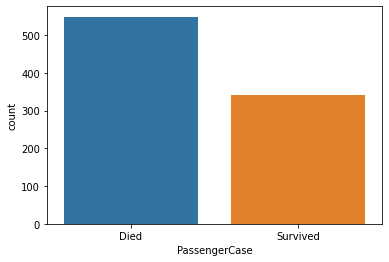

In [32]:
sns.countplot(data['PassengerCase'])

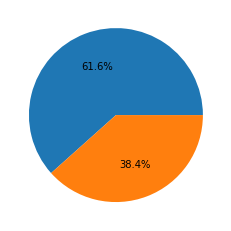

In [33]:
plt.pie(data['PassengerCase'].value_counts(),autopct='%2.1f%%')

plt.show()

# Passenger by Embarked

In [34]:
data['New_Embarked'].value_counts()

Southampton    644
Cherbourg      170
Queenstown      77
Name: New_Embarked, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='New_Embarked', ylabel='count'>

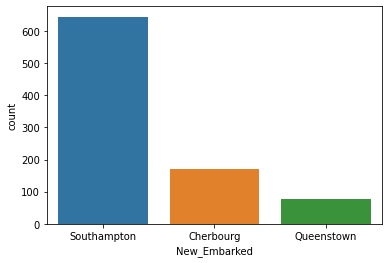

In [35]:
sns.countplot(data['New_Embarked'])

# How Many Passengers Were In First Class, Second Class, and Third Class?

In [36]:
data['New_Pclass'].value_counts()

Third Class     491
First Class     216
Second Class    184
Name: New_Pclass, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='New_Pclass', ylabel='count'>

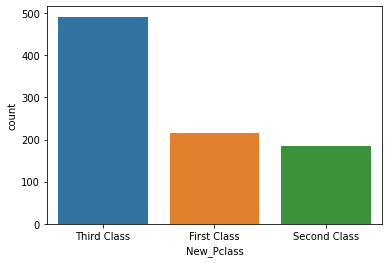

In [37]:
sns.countplot(data['New_Pclass'])


# Number of Male And Female Passengers

In [38]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

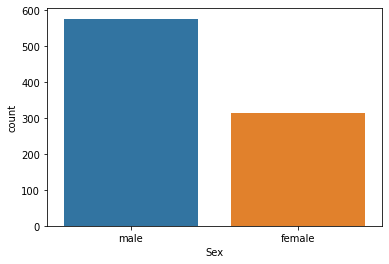

In [39]:
sns.countplot(data['Sex'])

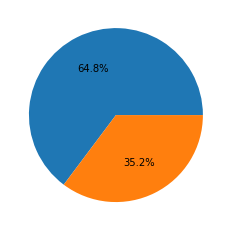

In [40]:
plt.pie(data['Sex'].value_counts(),autopct='%2.1f%%')

plt.show()

# Age Distribution

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

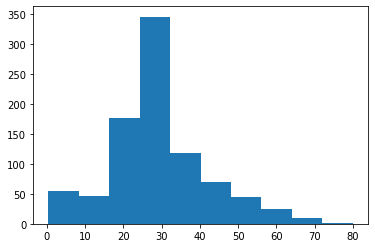

In [41]:
plt.hist(data['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

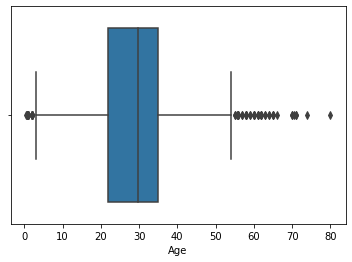

In [42]:
sns.boxplot(data['Age'],orient="Vertical")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_Cat', ylabel='count'>

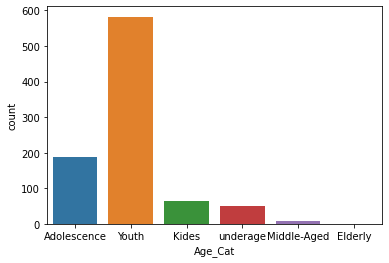

In [43]:
sns.countplot(data['Age_Cat'])

# Bivariate Analysis

# How Has Better Chance of Survival Male or Female?

In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'New_Embarked', 'PassengerCase', 'New_Pclass', 'Age_Cat',
       'Firstname', 'lastname', 'Title'],
      dtype='object')

In [45]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Age_Cat', ylabel='Survived'>

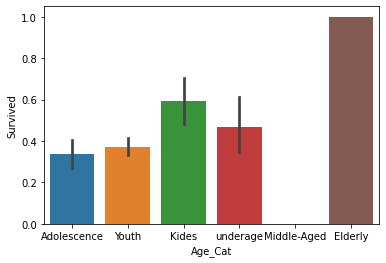

In [46]:
sns.barplot(x='Age_Cat',y='Survived',data=data)



# Which Passenger Class Had Better Chance of Survival (First, Second, Or Third Class)?

<AxesSubplot:xlabel='New_Pclass', ylabel='Survived'>

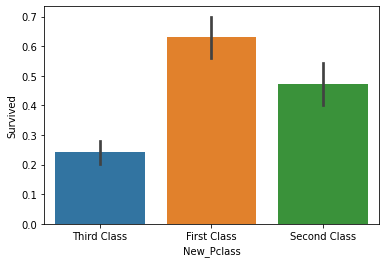

In [47]:
sns.barplot(x='New_Pclass',y='Survived',data=data)

# Which Gender of passenger Had Better Chance of Survival (Male Or Female)?

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

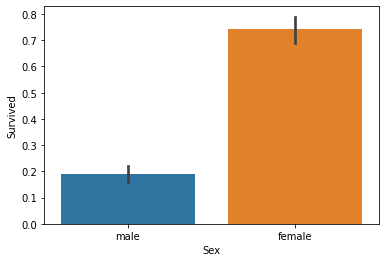

In [48]:
sns.barplot(x='Sex',y='Survived',data=data)

In [49]:
data.to_csv('Titanic_data.csv')